# Random forest
In this section we'll introduce some of the most common and powerful models of supervised learning: the Decision Tree and the Random Forest. Random Forest will be your first example of an ensemble model, a new modeling technique we'll return to throughout the course. Specifically, in this section we'll cover:

Decision Trees

Entropy in modeling

Random Forests

Ensemble models

The ID3 Algorithm for making a decision tree

When you're ready, let's get started with Decision Trees.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

# Decision Trees

Asking questions is a great way to get information about something you’re trying to identify. There are several classic games based on this process, like 20 Questions or Guess Who. In these games you’re usually asking questions to a _person_. You can also ask questions about a _dataset_. Does an observation have this particular feature? Is its value above a specific threshold? Each question you ask gives you more information about the observation you’re investigating. 

This kind of process is the basis of a genre of model called __Decision Trees__, which we’ll introduce here.

## Learning from Questions

We’ll use an abstract example to explain this concept further. Let’s say you have users in eight different cities: San Francisco, Paris, Cairo, Beijing, Sydney, New Delhi, Chicago, and Johannesburg. If you’re trying to figure out where a user is, there are several questions you could ask to give you information about their location. You could ask if they’re in the northern or southern hemisphere, or if they’re on an ocean or not. Each answer can further refine the possible outcomes.

Let’s look at the example of a decision tree below.

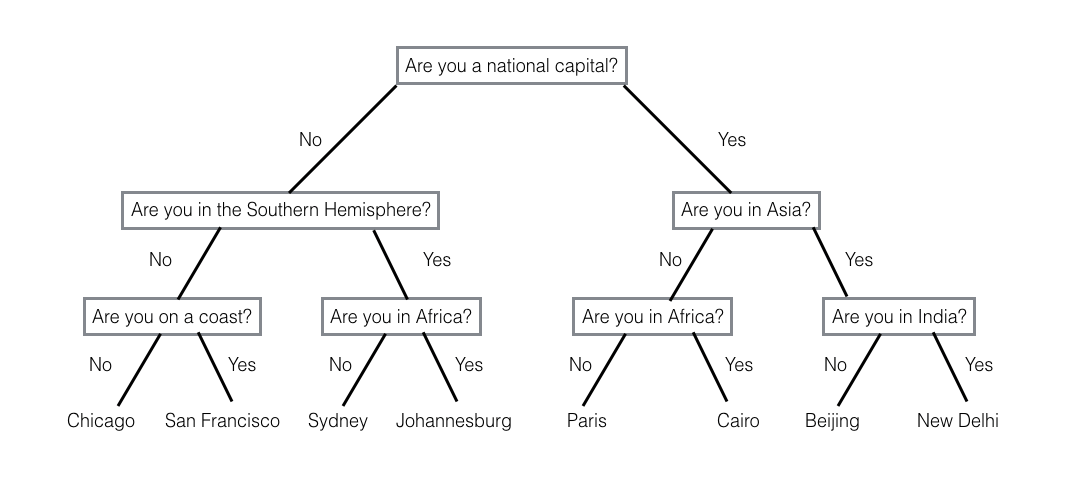

First let’s cover a bit of terminology. In this example each of the questions is a __node__. Nodes are either root nodes (the first node), interior nodes (follow up questions), or leaf nodes (endpoints). Every node except for leaf nodes contains a __rule__, which is the question we’re asking. The links between nodes are called __branches__ or __paths__. When put in terms of flow, you start at the root node and follow branches through interior nodes until you arrive at a leaf node. The whole thing would look much more like a tree if you turned it upside down so the root was at the bottom and the leaves and branches were higher up, but this is the conventional way to represent a tree.

Each rule divides the data into a certain number of subgroups, typically two subgroups with binary "yes or no" questions being particularly common. It is important to note that all data has to have a way to flow through the tree, it cannot simply disappear or not be contained in the tree.

Through a series of questions we’re able to gain information about where the user is, narrowing down the possible number of questions each time, ultimately arriving at an answer. This is basically all a decision tree is: a series of rules to arrive at a conclusion.

## Entropy

When designing a decision tree we want it to be as efficient as possible. It’s logical that not all questions consist of the same amount of information. Using the example above, if we were to ask if they were in Norway, that would be a pretty useless question. We gain no information from their answer.

Evaluating questions, or nodes, requires us to introduce two additional concepts from a field known as _information theory_: __information gain__ and __entropy__.

Entropy is a term you may be familiar with from other disciplines, particularly the sciences, where it means disorder. Here it will mean something along the lines of uncertainty. It can be defined, using Shannon Entropy $H$, as:

$$ H = -\sum_{i=1}^n P(x_i)log_2 P(x_i) $$


This equation corresponds to the weighted sum of log base two of the probabilities of all outcomes. The important thing to take away here is that this is a measure of uncertainty in the outcome. As we limit the possible number of outcomes and become more confident in the outcome, the entropy decreases. An area of the tree with only one possible outcome has zero entropy because there is no uncertainty. To delve into the reason for the logarithmic term here would require a deeper dive into information theory than we're going to do in this course, but you can find an explanation of it in this [primer on Shannon Entropy](https://arxiv.org/pdf/1405.2061.pdf).

We can then use entropy to measure the information gain, defined as the change in entropy from the original state to the weighted potential outcomes of the following state.

One method of designing an efficient decision tree is to gain the most information as quickly as possible.

## Coded Example

Let's use an example to go through how this could be implemented in Python using SKLearn. For this example let's say we're interested in whether a customer is likely to come back within 30 days. Here we have a snapshot of our customer base from some moment more than thirty days in the past. We have purchase amount, number of items purchased, if they used a promo on their purchase, if they're subscribed to our email list,  and how many times they have made a purchase. 

Since it's historical data, we also have a repeat variable for whether they were a repeat customer in the next thirty days from when this snapshot was taken.

In [2]:
# Set up all our data in a couple of data frames.
customers = pd.DataFrame()
customers['purchases_amount'] = [105, 65, 89, 99, 149, 102, 34, 120, 129, 39,
                                 20, 30, 109, 40, 55, 100, 23, 20, 70, 10]
customers['purchases_items'] = [1, 4, 5, 4, 7, 1, 2, 10, 6, 5,
                                1, 3, 2, 1, 5, 10, 3, 3, 1, 1]
customers['promo'] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
                      1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
customers['email_list'] = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
                           0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
customers['checkouts'] = [1, 5, 3, 3, 1, 2, 4, 4, 1, 1,
                          1, 1, 2, 4, 1, 1, 2, 1, 1, 1]

repeat_customer = pd.DataFrame()
repeat_customer['repeat'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

This visualization uses two packages you may not have used before: PyDotPlus and GraphViz. If you don't already have them, install PyDotPlus with `pip install pydotplus`. To install GraphViz, on a Mac run `brew install graphviz`, on a Windows machine with Anaconda run `conda install -c anaconda graphviz` or install from [their website](http://www.graphviz.org/Download..php), and on Linux install with your package manager. Here is the [relevant documentation](http://pydotplus.readthedocs.io/reference.html) if you'd like to read up on these tools.

# Install brew:

https://brew.sh/

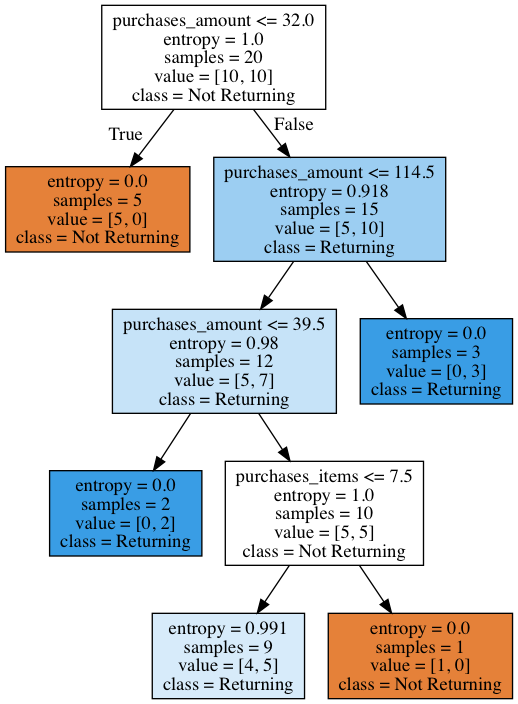

In [15]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=3,
    max_depth=4,
    #random_state = 1337
)
decision_tree.fit(customers, repeat_customer)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Here we have a visualization of the tree we've trained. For every node it shows the rule being applied, the entropy in the dataset (1 being the most uncertain, 0 being totally certain), the samples remaining, the distribution of those samples, and the dominant class.

You can also follow trees. As you move down a tree to the left you are meeting the rule, to the right you are outside of the rule. So in the branches below the root node, all nodes to the left have a `checkouts` value less than or equal to `2.5` and all the nodes to the right have a `checkouts` value that _isn't_ less than or equal to `.2.5`. You can follow this all the way down the tree, and the same is true for each new rule introduced at each node.

Note that we set a few parameters when we initialized our tree. Firstly, we wanted to use entropy to build the tree (`criterion='entropy'`), which follows the method we described above of looking for information gain. We also set `max_features` to `1`, meaning only one feature will be used per node. We set the `max_depth` of the tree to `4`, which means we only have four decision levels below the root for our classification.

We did something in this example that you wouldn't ever do when using decision trees for real: we set `random_state` to an arbitrary integer (`1337`). This classifier works by repeatedly splitting the training data randomly, which can lead to inconsistent trees. We're setting the random seed so the tree looks a specific way for this assignment, but you wouldn't do that when actually using this model.

## Why Decision Trees?

There are several reasons someone would want to use a decision tree. Some of the benefits include:

* Easy to represent the model visually
* Can handle varied types of data
* Feature selection is a part of the model
* Easy to use with little data preparation

However there are some key downsides to be aware of. Firstly there is a randomness to their generation, which can lead to variance in estimates. There is not a hard and fast rule to how the tree is built, so **it doesn't build the same way every time**. You saw this above when we discussed the `random_state` argument. In addition, **they are incredibly prone to overfitting**, particularly if you allow them to grow too deep or complex. Also note that because they are working from information gain, they are biased towards the dominant class, so **balanced data is needed**.

We used decision trees here as a classifier. You can also use them for regression, and we'll cover a regression version next which follows the same principles.

### Tinker

Spend a few minutes tinkering with this example and the arguments you pass into the model above. Remove the `random_state` argument and re-generate the tree a few times to see how random splitting changes your result. Change your `max_depth` to see how that affects things. Make sure you fully understand what each parameter does and what the tradeoffs are.